<a href="https://colab.research.google.com/github/congltk1234/Fashion_Items_Classification/blob/main/HM/HM_data_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the dataset returns metadata as well as a *training dataset* and *test dataset*.

* The model is trained using `train_dataset`.
* The model is tested against `test_dataset`.

The images are 28 $\times$ 28 arrays, with pixel values in the range `[0, 255]`. The *labels* are an array of integers, in the range `[0, 9]`. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [1]:
# https://drive.google.com/file/d/1CStasv_C0KcllvLMiWzGvr-nAEigojqS/view?usp=sharing
!gdown 1CStasv_C0KcllvLMiWzGvr-nAEigojqS
!unzip "HM_dataset_classification.zip" -d "/content"

Streaming output truncated to the last 5000 lines.
  inflating: /content/img/bag/0386681013.jpg  
  inflating: /content/img/bag/0386681016.jpg  
  inflating: /content/img/bag/0386681018.jpg  
  inflating: /content/img/bag/0386695004.jpg  
  inflating: /content/img/bag/0387444006.jpg  
  inflating: /content/img/bag/0392126003.jpg  
  inflating: /content/img/bag/0392203001.jpg  
  inflating: /content/img/bag/0408045009.jpg  
  inflating: /content/img/bag/0420378005.jpg  
  inflating: /content/img/bag/0428454001.jpg  
  inflating: /content/img/bag/0428454002.jpg  
  inflating: /content/img/bag/0436570008.jpg  
  inflating: /content/img/bag/0436570015.jpg  
  inflating: /content/img/bag/0436570019.jpg  
  inflating: /content/img/bag/0436570021.jpg  
  inflating: /content/img/bag/0436570023.jpg  
  inflating: /content/img/bag/0436570024.jpg  
  inflating: /content/img/bag/0436570025.jpg  
  inflating: /content/img/bag/0436570026.jpg  
  inflating: /content/img/bag/0436570028.jpg  
  inflati

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import os
import numpy as np

dirName = "/content/img"

class_names = os.listdir(dirName)
class_names

['shirt',
 'hat',
 'dress',
 'bag',
 'sunglass',
 'jacket',
 'shoe',
 'pants',
 'skirt',
 'shorts']

In [3]:
!pip install split-folders
import splitfolders
import os
path = "/content/img"
print(os.listdir(path))
########################################## Tên thư mục mới ######## Chia tỷ lệ: Train - Validate - Test. ( Nếu chỉ train và test thôi thì 0.8-0-0.2)
splitfolders.ratio(path,seed=1337, output="fashionItem", ratio=(0.8, 0, 0.2))


['shirt', 'hat', 'dress', 'bag', 'sunglass', 'jacket', 'shoe', 'pants', 'skirt', 'shorts']


Copying files: 5000 files [00:01, 4820.36 files/s]


In [5]:
!zip -r HM_dataset_classification.zip fashionItem

Streaming output truncated to the last 5000 lines.
updating: fashionItem/test/shirt/0294008047.jpg (deflated 3%)
updating: fashionItem/test/shirt/0411413020.jpg (deflated 2%)
updating: fashionItem/test/shirt/0311059025.jpg (deflated 2%)
updating: fashionItem/test/shirt/0891899004.jpg (deflated 2%)
updating: fashionItem/test/shirt/0265069014.jpg (deflated 2%)
updating: fashionItem/test/shirt/0238197030.jpg (deflated 2%)
updating: fashionItem/test/shirt/0386859007.jpg (deflated 3%)
updating: fashionItem/test/shirt/0318951020.jpg (deflated 2%)
updating: fashionItem/test/shirt/0378124009.jpg (deflated 2%)
updating: fashionItem/test/shirt/0403479001.jpg (deflated 10%)
updating: fashionItem/test/shirt/0893045004.jpg (deflated 2%)
updating: fashionItem/test/shirt/0897891001.jpg (deflated 1%)
updating: fashionItem/test/shirt/0896236001.jpg (deflated 1%)
updating: fashionItem/test/shirt/0426609042.jpg (deflated 1%)
updating: fashionItem/test/shirt/0838779002.jpg (deflated 2%)
updating: fashionI

In [4]:
# import necessary packages

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from imutils import paths
import os
import glob
import cv2
import numpy as np

def getListOfFiles(dirName):
    # create a list of file and sub directories
    # names in the given directory
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)

    return allFiles

imagePaths = getListOfFiles(dirName) ## Folder structure: datasets --> sub-folders with labels name
print(imagePaths[:5])


['/content/img/shirt/0443860027.jpg', '/content/img/shirt/0421387034.jpg', '/content/img/shirt/0836142004.jpg', '/content/img/shirt/0896161002.jpg', '/content/img/shirt/0306307005.jpg']


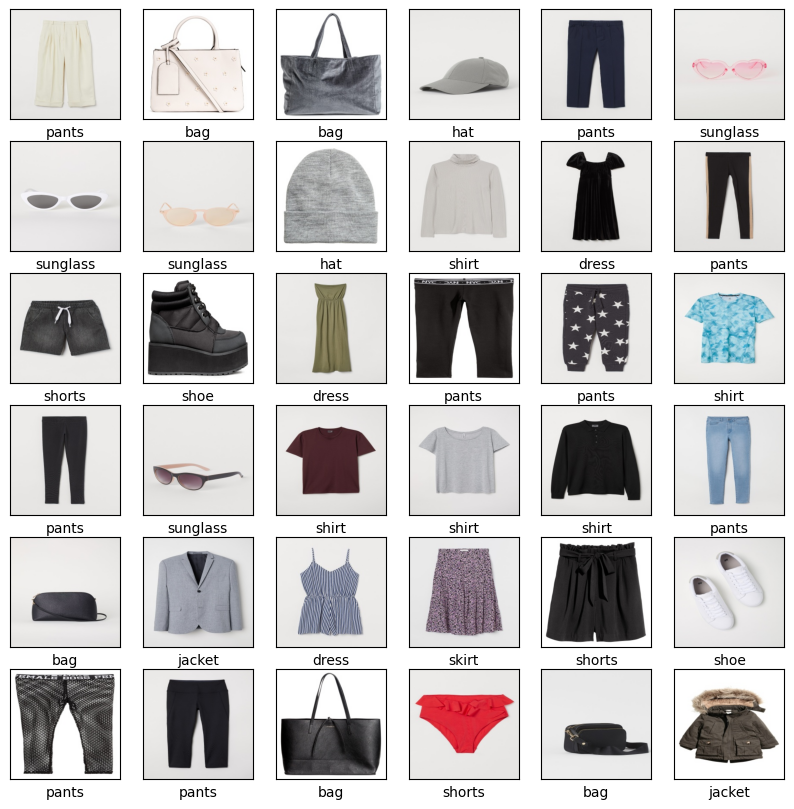

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
plt.figure(figsize=(10, 10))
rows, columns = 6, 6
for i, img_path in enumerate(random.sample(imagePaths, 36)):
    # Read and display the image
    image = mpimg.imread(img_path)

    plt.subplot(rows, columns, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image)
    plt.xlabel(img_path.split('/')[-2])

plt.show()
